#**Project Description**
Street View Housing Number Digit Recognition

# **Context**
Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed
number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical
character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

# **Data Description**
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). 

# **Data Source and Data Format**
SVHN is obtained from house numbers in Google Street View images.
format:h5 format

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.3.0'

In [115]:
import os
import h5py

In [116]:
os.getcwd()

'/content/drive/My Drive/AIML'

In [117]:
os.chdir('/content/drive/My Drive/AIML')

In [118]:
os.getcwd()

'/content/drive/My Drive/AIML'

## 1.Read the data from the h5py file and understand the train/test splits

In [119]:
df=h5py.File('SVHN_single_grey1.h5','r')
df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [120]:
X_Train=df['X_train'][:]
Y_Train=df['y_train'][:]
X_Test=df['X_test'][:]
Y_Test=df['y_test'][:]

In [121]:
print(X_Train.shape)
print(Y_Train.shape)
print(Y_Test.shape)
print(X_Test.shape)

(42000, 32, 32)
(42000,)
(18000,)
(18000, 32, 32)


In [122]:
Y_Test.view()

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

Label: 4
Label: 0
Label: 6


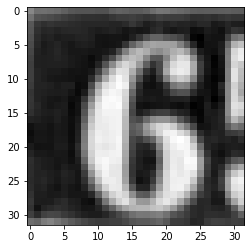

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(Y_Train[200]))
print("Label: {}".format(Y_Train[100]))
print("Label: {}".format(Y_Train[1200]))
plt.imshow(X_Train[200], cmap='gray')
plt.imshow(X_Train[100], cmap='gray')
plt.imshow(X_Train[1200], cmap='gray')

## 2.Reshape and normalize the train and test features

##a).Reshape

In [124]:
X_Train=X_Train.reshape(42000,1024)
print(X_Train.shape)
X_Test=X_Test.reshape(18000,1024)
print(X_Test.shape)


(42000, 1024)
(18000, 1024)


##b).Normalize

In [125]:
print(X_Train.max())
print(X_Train.min())

X_Train = X_Train / 255.0
X_Test = X_Test / 255.0

print(X_Train.max())
print(X_Test.min())

254.9745
0.0
0.9999
0.0


#3.One hot encode the labels for train and test data

In [126]:
Y_Train=tf.keras.utils.to_categorical(Y_Train,num_classes=10)
Y_Test=tf.keras.utils.to_categorical(Y_Test,num_classes=10)

In [127]:
print(Y_Train.shape)
print(Y_Test.shape)

(42000, 10)
(18000, 10)


In [128]:
Y_Train[0:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [129]:
Y_Test[0:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


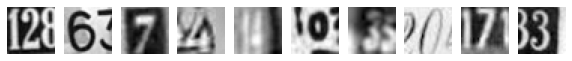

In [130]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_Train[i].reshape(32,32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(Y_Train[0:10][i])))
plt.show()

#4.Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax

#As we have already used reshape operation,so we will not going to use flatten layer

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

In [132]:
model = Sequential()
model.add(Dense(256, input_shape=(1024,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#5.Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation

In [133]:
adam = optimizers.Adam(lr=0.01, decay=1e-6)

In [134]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#6.Fit and evaluate the model. Print the loss and accuracy for the test data

##a)Fit model

In [135]:
model.fit(X_Train, Y_Train, validation_data=(X_Test, Y_Test), epochs=100,batch_size=100)

Epoch 1/100
420/420 [==============================] - 1s 4ms/step - loss: 2.1459 - accuracy: 0.2025 - val_loss: 1.7229 - val_accuracy: 0.4151
Epoch 2/100
420/420 [==============================] - 1s 3ms/step - loss: 1.5409 - accuracy: 0.4814 - val_loss: 1.3697 - val_accuracy: 0.5517
Epoch 3/100
420/420 [==============================] - 1s 3ms/step - loss: 1.3314 - accuracy: 0.5670 - val_loss: 1.2473 - val_accuracy: 0.6022
Epoch 4/100
420/420 [==============================] - 1s 3ms/step - loss: 1.2354 - accuracy: 0.6078 - val_loss: 1.2215 - val_accuracy: 0.6142
Epoch 5/100
420/420 [==============================] - 1s 3ms/step - loss: 1.1708 - accuracy: 0.6305 - val_loss: 1.1308 - val_accuracy: 0.6471
Epoch 6/100
420/420 [==============================] - 1s 3ms/step - loss: 1.1219 - accuracy: 0.6459 - val_loss: 1.1554 - val_accuracy: 0.6279
Epoch 7/100
420/420 [==============================] - 1s 3ms/step - loss: 1.0790 - accuracy: 0.6603 - val_loss: 1.0978 - val_accuracy: 0.6559

##b)Evaluate the model

In [136]:
model.evaluate(X_Test, Y_Test)

563/563 [==============================] - 1s 2ms/step - loss: 0.8188 - accuracy: 0.7642


[0.8187500834465027, 0.7641666531562805]